In [1]:
# Install the twitter API
!pip install tweepy

In [2]:
# Import Libraries
import os
import re
import time
import json
import tweepy
import requests
import webbrowser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

## Data Gathering:

##### For this project, three sources of data were gathered. The methods used for each data source were different.

Twitter Archive: This data was obtained by downloading the file either manually or through a program using the Request library.

Tweet Image Predictions: This data could only be obtained programmatically through the use of the Request library as the file, image_predictions.tsv, is hosted on Udacity's servers and cannot be accessed manually.

Tweets: To gather information about each tweet, such as the retweet count and favorite count, the tweet IDs from the WeRateDogs Twitter archive were extracted and stored in a file (tweet_id.txt). Then, the Twitter API was queried using Python's Tweepy library to gather the JSON data for each tweet, which was then stored in another file (tweet_json.txt).

#### Directly download the WeRateDogs Twitter archive file

In [3]:
if not os.path.exists('twitter_archive_enhanced.csv'): #confirm if file not downloaded already
    try:
        url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
        urlretrieve(url, 'twitter_archive_enhanced.csv')
        print('File saved successfully')
    except OSError as e:
        print(e)

File saved successfully


In [4]:
df_archive = pd.read_csv('twitter_archive_enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Use the Requests library to download the tweet image predictions

In [5]:
if not os.path.exists("image_predictions.tsv"):
    try:
        url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
        page = requests.get(url)
        print('Connection sucessful')
        with open('image_predictions.tsv', 'wb') as file:
            file.write(page.content)
            print('File saved successfully')
    except OSError as e:
        print(e)

In [6]:
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Extract tweet_id from twitter_archive_enhanced.csv file and save it line by line

In [7]:
tweet_ids = list(df_archive.tweet_id)

file_name = 'tweet_ids.txt'
with open(file_name, 'w') as f:
  for id in tweet_ids:
    f.write(f'{str(id)}\n')

'''
Test if it can be printed line by line.

 with open(file_name, 'r') as f:
  tweet_ids = f.readline()
  print(tweet_ids)
'''

"\nTest if it can be printed line by line.\n\n with open(file_name, 'r') as f:\n  tweet_ids = f.readline()\n  print(tweet_ids)\n"

##### Download tweets with API

In [8]:
print("Unable to set the Twitter Dev account due to known issue that prevents Twitter's OTP arrive to bunch of user mobiles in India. Hence decided to go ahead with the file downloaded from Udacity website.")


Unable to set the Twitter Dev account due to known issue that prevents Twitter's OTP arrive to bunch of user mobiles in India. Hence decided to go ahead with the file downloaded from Udacity website.


#####  Reading the tweet_json.txt file

In [9]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

In [10]:
# Select columns to be used for the analysis
id = []
favorite_count = []
retweet_count = []
created_at = []
for value in tweets:
  id.append(value['id'])
  favorite_count.append(value['favorite_count'])
  retweet_count.append(value['retweet_count'])
  date = time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(value['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
  created_at.append(date)


dict = {
    'Created_at' : created_at,
    'tweet_id' : id,
    'favorite_count' : favorite_count,
    'retweet_count' : retweet_count,
    }

df_tweet = pd.DataFrame(dict)

In [11]:
df_tweet.head()

,Created_at,tweet_id,favorite_count,retweet_count
0,2017-08-01 16:23:56,892420643555336193,33810,7009
1,2017-08-01 00:17:27,892177421306343426,29330,5301
2,2017-07-31 00:18:03,891815181378084864,22053,3481
3,2017-07-30 15:58:51,891689557279858688,36940,7225
4,2017-07-29 16:00:24,891327558926688256,35310,7760


## Assessing Data

Requirements- 

For this section, identify and record at least eight quality issues and two tidiness issues using both visual assessment and programmatic assessment on the data.

Please keep the following key points in mind during the data assessment:

Focus on original ratings (excluding retweets) that have accompanying images. There are over 5000 tweets in the dataset, but not all are dog ratings and some may be retweets.
A complete assessment and cleaning of the entire dataset is not necessary to showcase your data wrangling skills. The requirements of the project are to assess and clean at least 8 quality issues and 2 tidiness issues.
The unique rating system, where the numerators are greater than the denominators, does not require cleaning and is a crucial part of WeRateDogs' popularity.
Gathering tweets beyond August 1st, 2017 is not necessary, but if done, note that the image predictions for these tweets cannot be obtained as the algorithm is not accessible.


In [12]:
df_archive
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
df_image
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
df_tweet
df_tweet.head()

,Created_at,tweet_id,favorite_count,retweet_count
0,2017-08-01 16:23:56,892420643555336193,33810,7009
1,2017-08-01 00:17:27,892177421306343426,29330,5301
2,2017-07-31 00:18:03,891815181378084864,22053,3481
3,2017-07-30 15:58:51,891689557279858688,36940,7225
4,2017-07-29 16:00:24,891327558926688256,35310,7760


In [15]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
Created_at        2327 non-null object
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [18]:
all_columns = pd.Series(list(df_archive) + list(df_image) + list(df_tweet))
all_columns[all_columns.duplicated()]

17    tweet_id
30    tweet_id
dtype: object

In [19]:
df_archive.isnull().sum().sum()

11140

In [20]:
df_image.isnull().sum().sum()

0

In [21]:
df_tweet.isnull().sum().sum()

0

In [22]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
df_tweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7054.808767,2471.230769
std,6.820795e+16,10963.276515,4185.223445
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1225.500000,494.500000
50%,7.178418e+17,3050.000000,1149.000000
75%,7.986547e+17,8606.000000,2860.500000
max,8.924206e+17,144897.000000,70742.000000


In [25]:
df_archive['in_reply_to_status_id'].unique()

array([             nan,   8.86266357e+17,   8.81607037e+17,
         8.79553827e+17,   8.70726203e+17,   8.63425646e+17,
         6.67152164e+17,   8.57156678e+17,   8.55818117e+17,
         8.56286004e+17,   8.55861584e+17,   8.55858536e+17,
         8.50328819e+17,   8.48212112e+17,   8.47606176e+17,
         7.59099524e+17,   8.40698300e+17,   8.38145499e+17,
         8.38085539e+17,   8.35245984e+17,   8.32087548e+17,
         8.31903044e+17,   8.26598365e+17,   8.23326389e+17,
         8.21152593e+17,   8.13127252e+17,   8.11627233e+17,
         7.33109485e+17,   8.01854331e+17,   8.00857954e+17,
         7.97123751e+17,   7.72743019e+17,   7.66711819e+17,
         7.63865175e+17,   7.50180499e+17,   7.47648654e+17,
         7.46885919e+17,   6.91416866e+17,   7.38411920e+17,
         7.29113531e+17,   7.07980066e+17,   7.03255936e+17,
         7.04485745e+17,   7.03041950e+17,   6.96488711e+17,
         6.75349384e+17,   6.70668383e+17,   6.93642232e+17,
         6.93572216e+17,

In [26]:
df_archive['in_reply_to_user_id'].unique()

array([             nan,   2.28118160e+09,   4.73844300e+07,
         3.10544075e+09,   1.64877600e+07,   7.75962000e+07,
         4.19698384e+09,   1.80670967e+08,   2.79280991e+08,
         1.94351775e+08,   1.36157220e+07,   2.19550580e+07,
         8.40547864e+17,   2.89413118e+09,   2.62595760e+07,
         3.05820820e+07,   2.06837240e+07,   1.58285381e+09,
         1.13211856e+08,   1.18563420e+07,   2.91859009e+08,
         2.91663050e+07,   7.30505014e+17,   1.58464070e+07,
         4.71729748e+09,   3.58972768e+08,   2.31910820e+09,
         2.87854860e+07,   1.19898851e+09,   4.67036706e+08,
         1.63746780e+07,   2.14356580e+07])

In [27]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None
1881,675003128568291329,NaN,NaN,2015-12-10 17:24:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Laela. She's adorable. Magnificent eyes. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675003128...,12,10,Laela,None,None,None,None
935,753398408988139520,NaN,NaN,2016-07-14 01:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. Her batteries are low. 12/10 pr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753398408...,12,10,Scout,None,None,None,None
1390,700151421916807169,NaN,NaN,2016-02-18 02:54:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If a pupper gave that to me I'd probably start...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700151421...,11,10,None,None,None,pupper,None
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,None,None


In [28]:
df_archive.tweet_id.duplicated().sum()

0

In [29]:
df_archive.doggo.duplicated().sum()

2354

In [30]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [31]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [32]:
df_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [33]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1892,849336543269576704,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,1,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True
768,689280876073582592,https://pbs.twimg.com/media/CZDRTAPUoAEaqxF.jpg,3,Chihuahua,0.637546,True,American_Staffordshire_terrier,0.150694,True,Staffordshire_bullterrier,0.103953,True
807,692017291282812928,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,1,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True


In [34]:
df_image.p1_dog.unique()

array([ True, False], dtype=bool)

In [35]:
df_image.p2_dog.unique()

array([ True, False], dtype=bool)

In [36]:
df_image.p3_dog.unique()

array([ True, False], dtype=bool)

In [37]:
df_tweet.sample(5)

,Created_at,tweet_id,favorite_count,retweet_count
533,2016-12-01 19:56:00,804413760345620481,0,3013
414,2017-01-15 21:49:15,820749716845686786,29850,9221
1178,2016-04-01 04:30:16,715758151270801409,3427,1292
932,2016-07-08 00:04:50,751205363882532864,5909,1666
1192,2016-03-29 00:12:05,714606013974974464,3353,834


## Working with data quality issues & Cleansing the data


### Quality related Objectives:


##### archive table
Change the datatype for some of the columns e.g timestamp

A lot of missing data in the features

Missing values represented as None

Expanded_url cintaining more than one url


##### image table
Lowercase for P1, P2, and P3 sometimes
Text column not properly formatted

##### tweet table
Extract the date from Created_at column
Rename the Created_at column as Timestamp to bridge uniformity


### Data Cleanliness related objectives
P1, P2, and P3 should be formatted properly in the image table

Remove html tags from the source column in the archive table

Tweet_id in archive table duplicated in image and tweet tables

In [38]:
# Make copies of original pieces of data
archive = df_archive.copy()
image = df_image.copy()
tweet = df_tweet.copy()

### Issue1: Missing Data
Define: archive: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp contain little or no meaningful data and should be dropped

In [39]:
archive.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], inplace = True)

In [40]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue2: Data type issues
archive: Timestamp is a datetime and not object

archive: Tweet_id is an object not an integer

image: P2_dog is a boolean and not integer

tweet: Created_at is a datetime and not integer

Solution- Change the timestamp data type to datetime, p2_dog to boolean, and tweet_id to object

In [41]:
archive['timestamp'] = pd.to_datetime(archive['timestamp'])
archive['tweet_id'] = archive['tweet_id'].astype(str)
image['tweet_id'] = image['tweet_id'].astype(str)
image['p2_dog'] =  image['p2_dog'].astype(bool)
tweet['Created_at'] = pd.to_datetime(tweet['Created_at'])
tweet['tweet_id'] = tweet['tweet_id'].astype(str)

In [42]:
#test if changing the data type worked
archive.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

In [43]:
#test if changing the data type worked
image.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [44]:
#test if changing the data type worked
tweet.dtypes

Created_at        datetime64[ns]
tweet_id                  object
favorite_count             int64
retweet_count              int64
dtype: object

### Issue3: Column name format
Solution- Change the created_at to timestamp in tweet table

In [45]:
archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [46]:
image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [47]:
tweet.rename(columns= {"Created_at": "timestamp"}, inplace = True)

In [48]:
#test if column name format issue is fixed
tweet.columns

Index(['timestamp', 'tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

### Issue4: Format p1, p2, and p3 in the image table.
Solution- Replace "-" with space (" ") for p1, p2, and p3 in the image table

In [49]:
image.p1 = image.p1.str.replace("_", ",")
image.p2 = image.p2.str.replace("_", ",")
image.p3 = image.p3.str.replace("_", ",")

In [50]:
#Test if this got fixed
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,"Welsh,springer,spaniel",0.465074,True,collie,0.156665,True,"Shetland,sheepdog",0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,"miniature,pinscher",0.074192,True,"Rhodesian,ridgeback",0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,"German,shepherd",0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,"Rhodesian,ridgeback",0.408143,True,redbone,0.360687,True,"miniature,pinscher",0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,"miniature,pinscher",0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue5: Format of the timestamp and source in archive
Solution-

Remove html tags from the source column in the archive table

Make the timestamp to contain year, month and day only

Choose only the expanded url url that follows the normal pattern

In [51]:
archive['source']  = archive.source.str.extract('(http://\w+\.com/\w+/iphone)', expand = True)
archive['expanded_urls']  = archive.expanded_urls.str.extract('(https://\w+\.com/\w+/\w+/\d+/\w+/\d)', expand = True)

archive['timestamp'] = archive['timestamp'].astype(str)
tweet['timestamp'] = tweet['timestamp'].astype(str)
archive['timestamp'] = archive['timestamp'].str.extract('(\d{4}[-]\d{2}[-]\d{2})', expand = True)
tweet['timestamp'] = tweet['timestamp'].str.extract('(\d{4}[-]\d{2}[-]\d{2})', expand = True)
archive['timestamp'] = pd.to_datetime(archive['timestamp'])
tweet['timestamp'] = pd.to_datetime(tweet['timestamp'])

In [52]:
archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Storing our data (Store the combined, evaluated, and cleansed master dataset in a CSV file called "twitter_archive_master.csv".)

In [53]:
twitter_archive_master = pd.merge(pd.merge(archive, image, on = "tweet_id"), tweet, on = "tweet_id")

In [54]:
twitter_archive_master.head()

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorite_count,retweet_count
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,33810,7009
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,29330,5301
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,22053,3481
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,False,"Labrador,retriever",0.168086,True,spatula,0.040836,False,2017-07-30,36940,7225
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,True,"English,springer",0.225770,True,"German,short-haired,pointer",0.175219,True,2017-07-29,35310,7760


### Observation - both timestamp_x and timestamp_y are the same

Solution- 

Drop timestamp_y

Remove _x from timestamp_x

In [55]:
twitter_archive_master.drop(columns = ['timestamp_y'], inplace= True)
twitter_archive_master.rename(columns = {'timestamp_x':'timestamp'}, inplace = True)
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33810,7009
1,892177421306343426,2017-08-01,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29330,5301
2,891815181378084864,2017-07-31,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22053,3481
3,891689557279858688,2017-07-30,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,"Labrador,retriever",0.168086,True,spatula,0.040836,False,36940,7225
4,891327558926688256,2017-07-29,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,"English,springer",0.225770,True,"German,short-haired,pointer",0.175219,True,35310,7760


## Data engineering

In [56]:
twitter_archive_master['month'] = twitter_archive_master.timestamp.dt.month_name()
twitter_archive_master['day'] = twitter_archive_master.timestamp.dt.day_name()

In [57]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index = False)

## Analyse and Visualize

### Questions

Ten top months with the highest favorite_count

Ten top months with the highest tweet_count

Influence of the day on the favourite_count

Finding the correlatiion between the Favorite and retweet counts

In [58]:
df = twitter_archive_master.copy()

In [59]:
def barhplot(x, y, xlabel, title):
    plt.figure(figsize=  (14, 8))
    plt.barh(x, y, align = 'center')
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel, fontsize = 18)
    plt.title(title, fontsize = 18)
    plt.show();

#### Ten top months with the highest favorite_count

In [60]:
top = df.sort_values(by = 'favorite_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'favorite_count', 'month']].head(10)
top_10

,tweet_id,source,favorite_count,month
836,744234799360020481,http://twitter.com/download/iphone,144897,June
319,822872901745569793,http://twitter.com/download/iphone,124127,January
422,807106840509214720,http://twitter.com/download/iphone,111710,December
110,866450705531457537,http://twitter.com/download/iphone,108924,May
871,739238157791694849,http://twitter.com/download/iphone,107253,June
59,879415818425184262,http://twitter.com/download/iphone,92885,June
348,819004803107983360,http://twitter.com/download/iphone,82714,January
138,859196978902773760,http://twitter.com/download/iphone,80607,May
94,870374049280663552,http://twitter.com/download/iphone,73941,June
1485,678399652199309312,http://twitter.com/download/iphone,73528,December


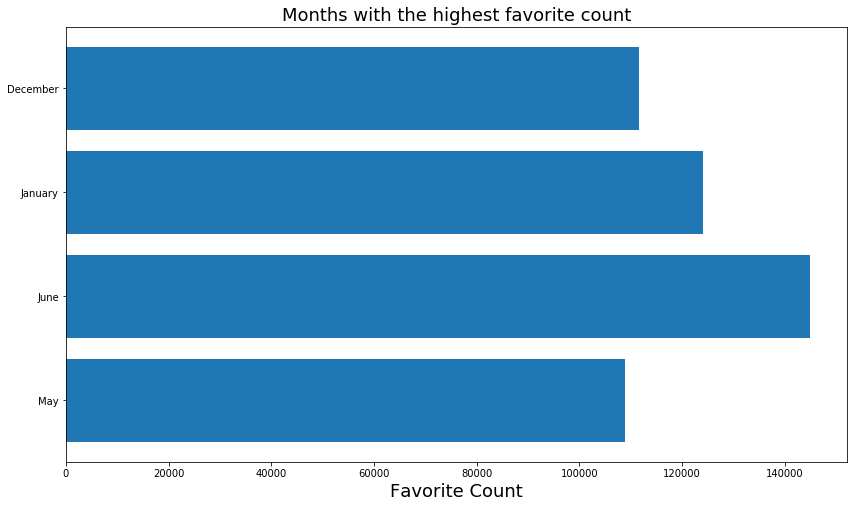

In [61]:
barhplot(top_10.month, top_10.favorite_count, "Favorite Count", "Months with the highest favorite count")

#### Ten top months with the highest Retweetcount

In [62]:
top = df.sort_values(by = 'retweet_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'text', 'retweet_count', 'month']].head(10)
top_10.head()

,tweet_id,source,text,retweet_count,month
836,744234799360020481,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,70742,June
871,739238157791694849,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,52908,June
422,807106840509214720,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,51687,December
319,822872901745569793,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,39926,January
59,879415818425184262,http://twitter.com/download/iphone,This is Duddles. He did an attempt. 13/10 some...,37457,June


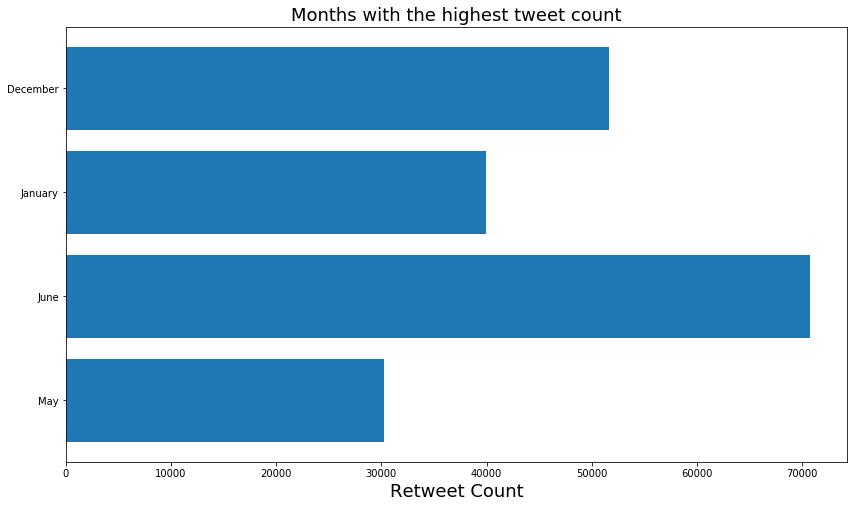

In [63]:
barhplot(top_10.month, top_10.retweet_count, "Retweet Count", "Months with the highest tweet count")

#### Correlation between the day and favorite count

In [64]:
top = df.groupby(by = 'day')
top = df.sort_values(by = 'favorite_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'text', 'favorite_count', 'day']].head(10)
top_10.head()

,tweet_id,source,text,favorite_count,day
836,744234799360020481,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,144897,Saturday
319,822872901745569793,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,124127,Saturday
422,807106840509214720,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,111710,Friday
110,866450705531457537,http://twitter.com/download/iphone,This is Jamesy. He gives a kiss to every other...,108924,Monday
871,739238157791694849,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,107253,Saturday


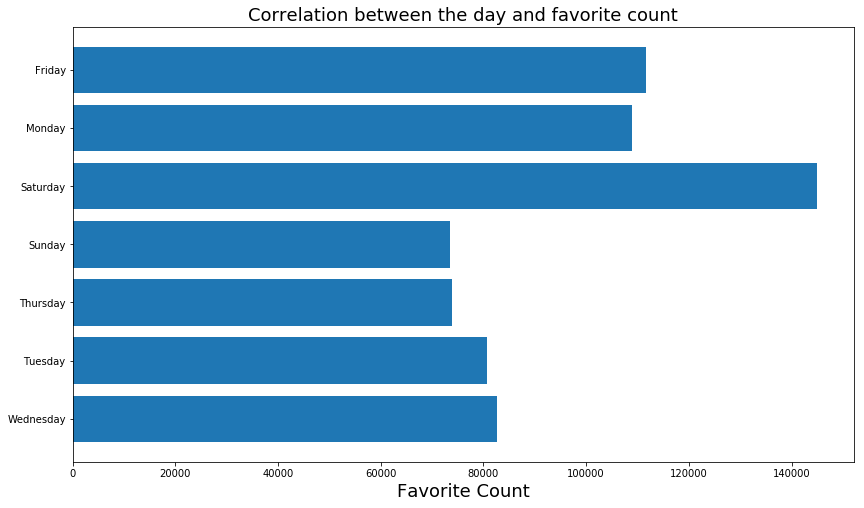

In [65]:
barhplot(top_10.day, top_10.favorite_count, "Favorite Count", "Correlation between the day and favorite count")

#### Correlation between favorite and retweet counts

In [66]:
df.favorite_count.corr(df.retweet_count)

0.86102978252850915

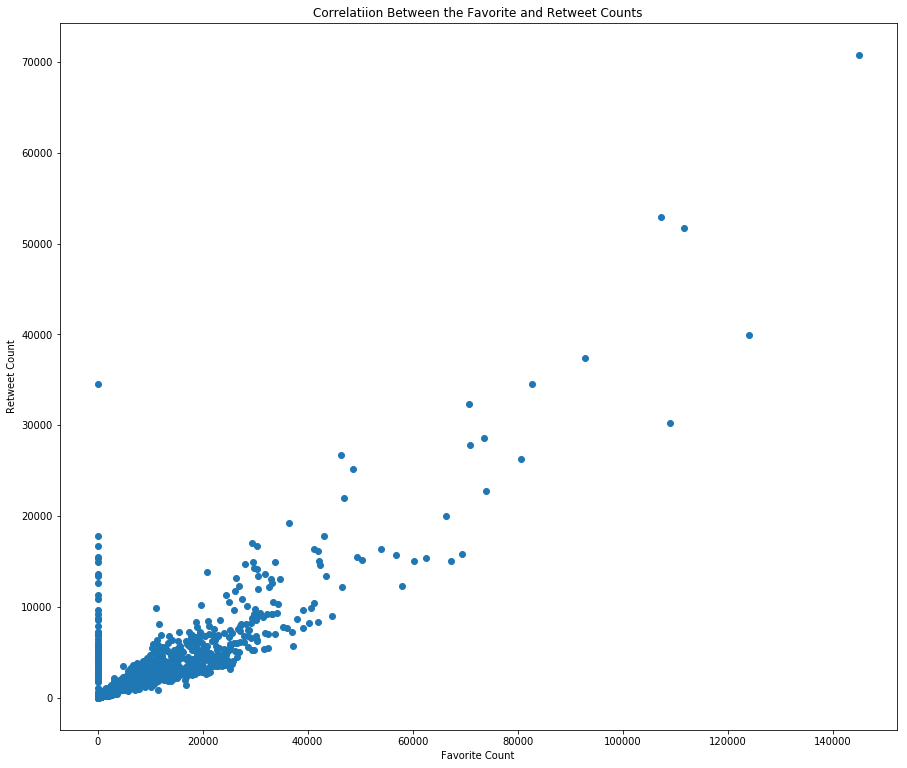

In [67]:
plt.figure(figsize=(15, 13))
ax = plt.axes()
ax.scatter(df.favorite_count, df.retweet_count)

ax.set_xlabel('Favorite Count')
ax.set_ylabel('Retweet Count')
ax.set_title('Correlatiion Between the Favorite and Retweet Counts')

ax.axis('tight')

plt.show()

#### Few more important correlations

In [68]:
df.favorite_count.corr(df.rating_numerator)

0.01605740884435734

In [69]:
df.favorite_count.corr(df.rating_denominator)

-0.025221199482836899

In [70]:
df.retweet_count.corr(df.rating_numerator)

0.01765920274621292

In [71]:
df.retweet_count.corr(df.rating_denominator)

-0.021366610584886463